In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust import graindist

In [3]:
# Some basic magic numbers

AMAX = 0.3 # maximum grain size, in um
RHO  = 3.0 # grain material density, in g cm^-3
MD   = 1.e-5 # dust mass column, g cm^-2

## Making a GrainDist object from scratch

In [4]:
MRN  = graindist.sizedist.Powerlaw(amax=AMAX)
ECUT = graindist.sizedist.ExpCutoff(acut=AMAX)
SIL  = graindist.composition.CmSilicate(rho=RHO)

In [5]:
gd_mrn  = graindist.GrainDist(MRN, SIL, md=MD)
gd_ecut = graindist.GrainDist(ECUT, SIL, md=MD)

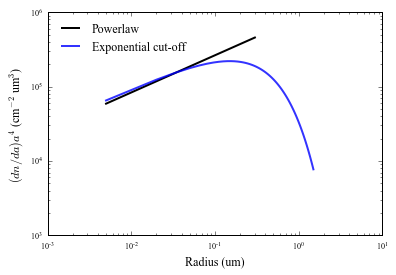

In [6]:
ax = plt.subplot(111)
gd_mrn.plot(ax, color='k', lw=2, label='Powerlaw')
gd_ecut.plot(ax, color='b', lw=2, alpha=0.8, label='Exponential cut-off')
plt.legend(loc='upper left', frameon=False)

## Making a GrainDist object with helper function

This is a shortcut for making some common grain distributions

You can change AMAX and RHO from here, too

For the different grain size distributions, amax acts in a different way:

+ *graindist.sizedist.Grain:* amax sets the singular grain size

+ *graindist.sizedist.Powerlaw:* amax sets the maximum grain size in the distribution

+ *graindist.sizedist.ExpCutoff:* amax sets the "acut" value

In [7]:
gd_mrn2 = graindist.make_GrainDist('Powerlaw', 'Silicate', amax=AMAX, rho=RHO, md=MD)
gd_ecut2 = graindist.make_GrainDist('ExpCutoff', 'Silicate', amax=AMAX, rho=RHO, md=MD)

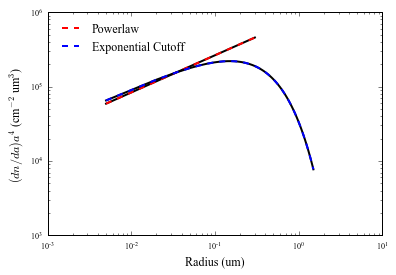

In [8]:
ax = plt.subplot(111)
gd_mrn.plot(ax, color='k', lw=2, label='')
gd_mrn2.plot(ax, color='r', lw=2, ls='--', label='Powerlaw')

gd_ecut.plot(ax, color='k', lw=2, label='')
gd_ecut2.plot(ax, color='b', lw=2, ls='--', label='Exponential Cutoff')
plt.legend(loc='upper left', frameon=False)

### Note that the values I've used in this example are different from the defaults

Silicate has a default grain material density of 3.8 g cm^-3

In [9]:
gd_mrn3 = graindist.make_GrainDist('Powerlaw', 'Silicate', md=MD)
gd_ecut3 = graindist.make_GrainDist('ExpCutoff', 'Silicate', md=MD)

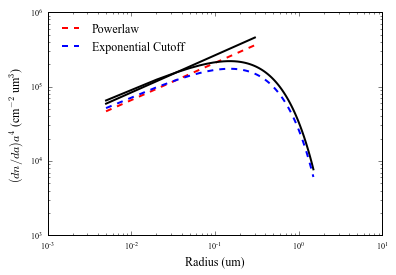

In [10]:
ax = plt.subplot(111)
gd_mrn.plot(ax, color='k', lw=2, label='')
gd_mrn3.plot(ax, color='r', lw=2, ls='--', label='Powerlaw')

gd_ecut.plot(ax, color='k', lw=2, label='')
gd_ecut3.plot(ax, color='b', lw=2, ls='--', label='Exponential Cutoff')
plt.legend(loc='upper left', frameon=False)

## You can also get the mass density of dust grains

But the GrainDist.plot function only does number density

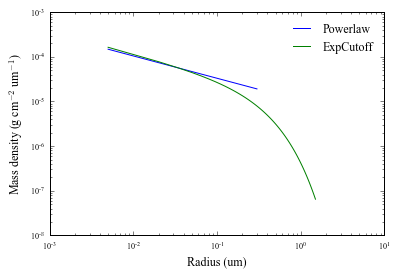

In [11]:
plt.plot(gd_mrn.a, gd_mrn.mdens, label='Powerlaw')
plt.plot(gd_ecut.a, gd_ecut.mdens, label='ExpCutoff')
plt.loglog()
plt.xlabel('Radius (um)')
plt.ylabel('Mass density (g cm$^{-2}$ um$^{-1}$)')
plt.legend(loc='upper right', frameon=False)

### You can't plot single grain sizes

It prints the number density instead

In [12]:
gd_single = graindist.make_GrainDist('Grain', 'Silicate', amax=AMAX)

In [ ]:
gd_single.plot()